<a href="https://colab.research.google.com/github/varunsmhatre/TF-Developer/blob/main/Classification/MakeMoons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [5]:
from sklearn import datasets
X, y = datasets.make_moons(n_samples=1000, shuffle=True, noise=0.05, random_state=42)
X.shape, y.shape

((1000, 2), (1000,))

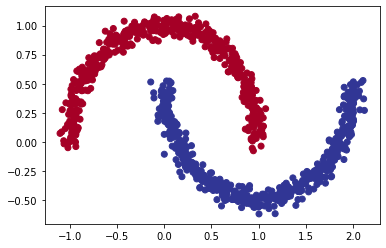

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [7]:
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set 

((800, 2), (200, 2))

In [18]:
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 1ms/step - loss: 0.5409 - accuracy: 0.7500
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.8763
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2749 - accuracy: 0.8863
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2344 - accuracy: 0.8888
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2164 - accuracy: 0.9000
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2054 - accuracy: 0.8950
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2015 - accuracy: 0.9112
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.1914 - accuracy: 0.9100
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1835 - accuracy: 0.9162
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1722 - accuracy: 0.9175
Epoch 11/20
25/25 [

In [20]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0344 - accuracy: 0.9950


[0.03444933518767357, 0.9950000047683716]

In [31]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
   3. https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/02_neural_network_classification_in_tensorflow.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


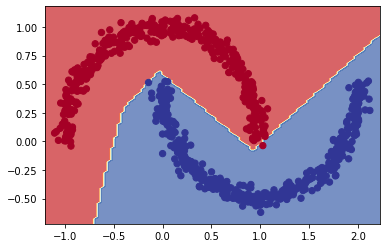

In [35]:
plot_decision_boundary(model, X_train, y_train)
# plot_decision_boundary(model, X_test, y_test)

In [41]:
y_pred = model.predict(X_test)
y_pred = tf.round(y_pred)

In [44]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
confusion_matrix(y_test, y_pred)

array([[100,   1],
       [  0,  99]])